### 0. Run the following if using Google colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!cp -a /content/drive/Othercomputers/My\ Laptop/SIS6116\ -\ Assignment1/data/ /content/
!cp -a /content/drive/Othercomputers/My\ Laptop/SIS6116\ -\ Assignment1/modules/ /content/

Mounted at /content/drive


### 1. Initialise ACO (AS) parameters

In [4]:
from modules.aco.node import Node
from modules.aco.ant_colony import AntColony

NUMBER_OF_ANTS: int = 3
ALPHA: float = 1
BETA: float = 3
RHO: float = 0.1
INITIAL_PHEROMONE_LEVEL: float = 1
MAXIMUM_NUMBER_OF_ITERATIONS: int = 10

nodes: list[Node] = [
    Node(10, 10),
    Node(10, 20),
    Node(20, 10),
    Node(20, 20),
    Node(30, 10),
    Node(0, 100),
]

ant_colony = AntColony(
    NUMBER_OF_ANTS,
    ALPHA,
    BETA,
    RHO,
    INITIAL_PHEROMONE_LEVEL,
    MAXIMUM_NUMBER_OF_ITERATIONS,
    nodes,
)

### 2. Plot TSP graph

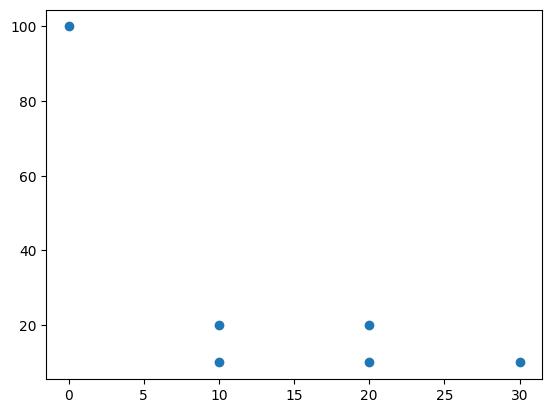

In [5]:
import matplotlib.pyplot as plt

x_values: list[float] = [n.x for n in nodes]
y_values: list[float] = [n.y for n in nodes]

plt.scatter(x_values, y_values)  # type: ignore
plt.show()  # type: ignore

### 3. Compute shortest path

In [ ]:
for i in range(MAXIMUM_NUMBER_OF_ITERATIONS):
    if i > MAXIMUM_NUMBER_OF_ITERATIONS:
        break

    ant_colony.iterate()
    print(ant_colony.best_tour)
    print(ant_colony.best_tour_cost)